In [123]:
import numpy as np 
import matplotlib.pyplot as plt

In [124]:
def quadratic_loss(x,y):
    return x**2 + 10 * y**2

In [125]:
def quadratic_grad(x,y):
    dx = 2 * x
    dy = 20 * y
    return np.array([dx,dy])

In [126]:
def gradient_descent(grad_func, lr, epochs, start_point):
    x,y = start_point
    path = [(x,y)]
    losses = [quadratic_loss(x,y)]

    for _ in range(epochs):
        grad = grad_func(x,y)
        x -= lr * grad[0]
        y -= lr * grad[1]
        path.append((x,y))
        losses.append(quadratic_loss(x,y))
    return np.array(path), losses

In [127]:
def adam_op(grad_func, lr, b1, b2, epsilon, epochs, start_point):
    x,y = start_point
    m = np.array([0.0, 0.0])
    v = np.array([0.0, 0.0])
    path = [(x,y)]
    losses = [quadratic_loss(x,y)]

    for t in range(1, epochs + 1):
        grad = grad_func(x, y)
        m = b1 * m + (1-b1) * grad
        v = b2 * v + (1-b2) * (grad ** 2)

        m_hat = m / (1 - b1 ** t)
        v_hat = v / (1 - b2 ** t)

        x -= lr * m_hat[0] / (np.sqrt(v_hat[0]) + epsilon)
        y -= lr * m_hat[1] / (np.sqrt(v_hat[1]) + epsilon)

        path.append((x,y))
        losses.append(quadratic_loss(x,y))
    return np.array(path), losses

In [128]:
def plot_paths(function, paths, labels, title) :
    X, Y = np.meshgrid(np. linspace(-2, 2, 400), np. linspace(-2, 2, 400))
    Z = function(X, Y)
    plt.figure(figsize=(8, 6))
    plt. contour(X, Y, Z, levels=50, cmap='jet')
    for path, label in zip(paths, labels) : 
        plt. plot(path[:, 0], path[ :, 1], label=label)
        plt.scatter(path[0, 0], path[0, 1], color='green', label="Start") 
        plt.scatter(path[-1, 0], path[-1, 1], color='red', label="End")

    plt.title(title) 
    plt. xlabel("x") 
    plt.ylabel("y") 
    plt.legend()
    plt.show( )

In [129]:
def plot_losses(losses, labels, title):
    plt. figure (figsize=(8, 6))
    for loss, label in zip(losses, labels):
        plt. plot(loss, label=label)

    plt.title (title)
    plt. xlabel ("Epoch")
    plt. ylabel("Loss")
    plt. legend ()
    plt. show()

In [130]:
lr_gd = 0.1 # Learning rate for GD
lr_adam = 0.1 # Learning rate for Adam
b1 = 0.9 # Beta1 for Adam
b2 = 0.999 # Beta2 for Adam
epsilon = 1e-8 # Small constant for Adam
epochs = 100
start_point = (1.5, 1.5) # Initial point far from the minimum

In [131]:
path_gd, losses_gd = gradient_descent(quadratic_grad, lr_gd, epochs, start_point)
path_adam, losses_adam = adam_op(quadratic_grad, lr_adam, b1, b2, epsilon, epochs, start_point)


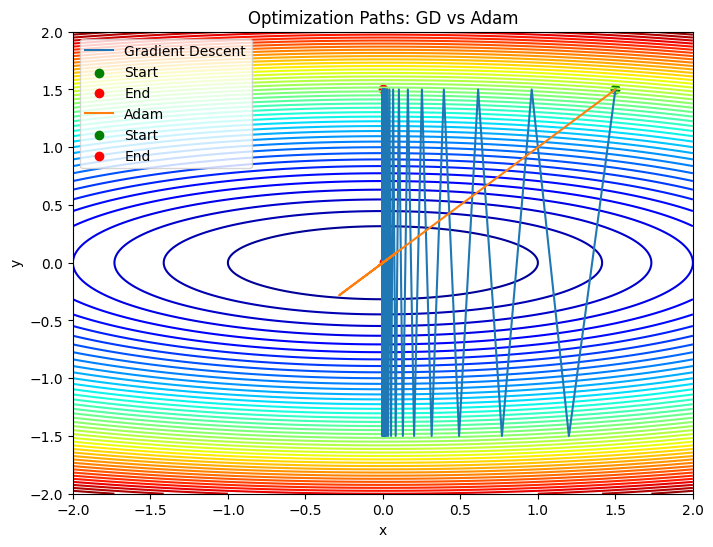

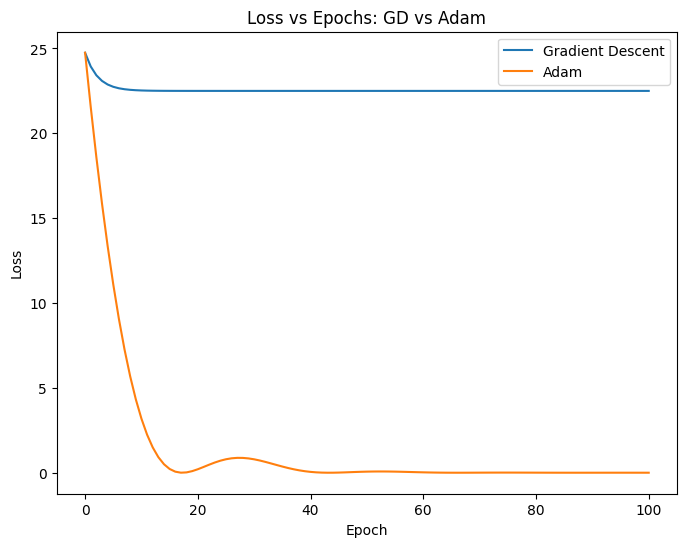

In [132]:
# Plot results
plot_paths(quadratic_loss, [path_gd, path_adam],
    ["Gradient Descent", "Adam" ],
    "Optimization Paths: GD vs Adam")

plot_losses([losses_gd, losses_adam],
["Gradient Descent", "Adam"],
"Loss vs Epochs: GD vs Adam")